In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import mean_squared_error

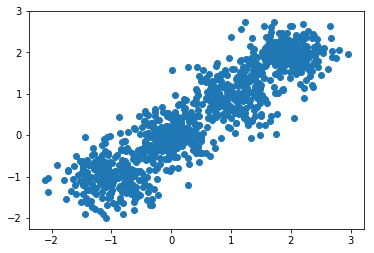

In [2]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.3, 0.4, 0.3], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

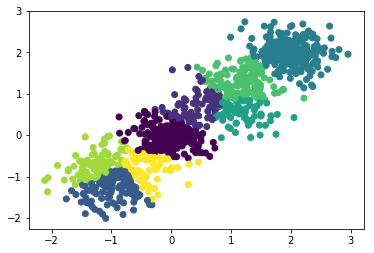

In [3]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = None).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [4]:
X

array([[-0.84102846, -0.33611855],
       [-0.00267533,  0.4617419 ],
       [ 0.65790974,  1.01020819],
       ...,
       [-0.24587536, -0.33420956],
       [ 2.4389705 ,  2.01897431],
       [-0.96972585, -1.08219369]])

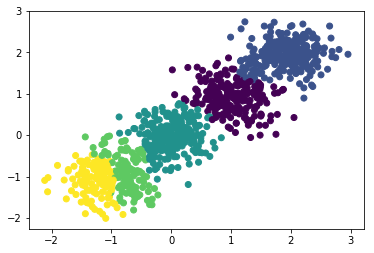

In [5]:
y_pred = Birch(n_clusters = 5, threshold = 0.3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

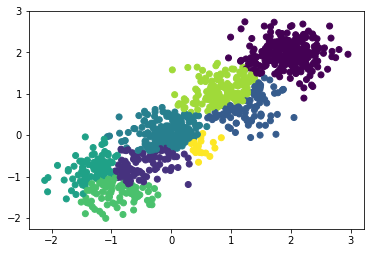

In [6]:
y_pred = Birch(n_clusters = 8, threshold = 0.4, branching_factor = 20).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
def transform(dataset, n_features):
    """
    :param n_features: 从文档中提取出tfidf值排名前n_features的单词
                       将每篇文档都表示成n_features的向量，如不含该词则对应的值为0；
    """
    vectorizer = TfidfVectorizer(max_df=100, max_features=n_features, min_df=10, use_idf=True,
                                 dtype=float)
    X = vectorizer.fit_transform(dataset)
    # print(X.shape)
    # vectorizer.get_feature_names()返回满足结果的前n_features个词;
    # print(vectorizer.get_feature_names())

    return X, vectorizer

In [9]:
data = pd.read_csv('context.csv',encoding='gbk',index_col=0)
dataset = data['data']
X,vectorizer = transform(dataset,n_features=500)

E:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [10]:
y_pred = Birch(n_clusters = 10).fit_predict(X)
y_pred

E:\anaconda\lib\site-packages\sklearn\cluster\birch.py:76: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


array([7, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 8, 8, 8, 4,
       4, 4, 4, 4, 4, 4, 4, 7, 7, 4, 8, 4, 4, 1, 6, 1, 1, 1, 1, 1, 7, 4,
       7, 4, 7, 7, 4, 4, 5, 4, 1, 4, 8, 8, 7, 7, 7, 7, 7, 7, 7, 8, 2, 1,
       3, 9, 0, 4, 9, 9, 4, 4, 7, 5, 4, 9, 4, 4, 2, 3, 9, 1, 1, 2, 7, 4,
       2, 4, 5, 3, 8, 4, 4, 4, 4, 2, 1, 4, 8, 1, 4, 4, 5, 5, 4, 3, 3, 4,
       3, 7, 6, 2, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 6,
       3, 3, 4, 1, 3, 3, 3, 4, 4, 4, 8, 3, 3, 1, 4, 4, 3, 4, 4, 6, 2, 2,
       2, 4, 4, 4, 4, 4, 7, 9, 7, 5, 4, 4, 2, 4, 2, 4, 7, 4, 2, 2, 2, 2,
       2, 1, 4, 2, 2, 2, 2, 4, 2, 4, 7, 4, 2, 4, 4, 2, 2, 7, 4, 5, 4, 7,
       2, 2, 9, 1, 4, 4, 4, 7, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 9, 6, 7, 4, 3, 2, 4, 2, 6, 4, 2, 2, 1, 1, 5, 8, 4, 7, 5,
       1, 1, 2, 2, 4, 4, 6, 4, 5, 4, 4, 4, 2, 4, 1, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 5, 8, 5, 4, 4, 1, 2, 4, 2, 4, 2, 2, 4, 4, 5,
       2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 1,

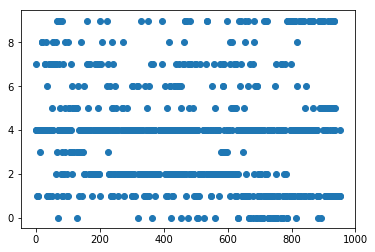

In [20]:
plt.scatter([i for i in range(len(y_pred))],y_pred,marker='o')
plt.show()